<a href="https://colab.research.google.com/github/deepluckyperson/sber_homework/blob/main/%D0%94%D0%97_9_10_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание

Ноутбук в колаб: https://colab.research.google.com/drive/1d-vvpJW8IWSPeodFnfaEVaZIQrys8uU0?usp=sharing

**Дедлайн: 01.01.2021, 23:59**


Формат отчетности - jupyter notebook. Однако вычислять производные не обязательно в Markdown. Если вычисляете вручную, то дополнительно с ноутбуком, отправляйте pdf-файл с расписанным решением.

### Пример реализации градиентного спуска: https://github.com/ddvika/Data-Science-School-2020/blob/main/lecture_9/gradient_methods.ipynb

# Задания

Перед выполнением ДЗ посмотрите на ноутбук, прикрепленный по ссылке выше. Там вы найдете реализацию градиентного спуска с постоянным и дробным шагом.

### Задание 1. [1 point]

Релизуйте градиентный спуск с постоянным шагом и с дробным шагом для функции
$$
y = x_{1}^{2}+5 x_{2}^{2}
$$

в произвольно выбранной Вами точке.

Поэксперементируйте с разными значениями шага (скорости обучения), попробуйте хотя бы по 2-3 разных значения.

In [ ]:
import numpy as np

def f(x):
    return x[0]**2+5*(x[1]**2)
    
def grad_f(x):
    return np.array([2*x[0], 10*x[1]])

def grad_descent_const_step(x = np.array([0, 0]), alpha = 0.001, epsilon = 0.05):
    grad = grad_f(x)
    n = 0
    check = 0
    while (np.linalg.norm(grad) > epsilon) or (check < 3):
        x = x - alpha*grad
        grad = grad_f(x)
        n+=1
        if (np.linalg.norm(grad) <= epsilon): check +=1
    print("Градиентный спуст с постоянным шагом выполнил {} шагов".format(n))
    print("Точка с координатами х1 = {}, x2 = {}".format(x[0], x[1]))
    return x

def grad_descent_step_splitting(x = np.array([0, 0]), alpha = 1, epsilon = 0.05, ksi = 0.5, lambda_d = 0.35):
    grad = grad_f(x)
    n = 0
    n_alpha = 0
    alpha_k = alpha
    x_k0 = x
    check = 0
    while np.linalg.norm(grad) > epsilon or check < 3:
        grad = grad_f(x_k0)
        x_k1 = x_k0 - alpha_k*grad
        while f(x_k1) - f(x_k0) > - alpha_k * ksi * (np.linalg.norm(grad)**2):
            alpha_k *= lambda_d
            x_k1 = x_k0 - alpha_k*grad
            n_alpha+=1
        x_k0 = x_k0 - alpha_k*grad
        alpha_k = alpha
        n+=1
        if (np.linalg.norm(grad) <= epsilon): check +=1
    x = x_k0
    print("Градиентный спуст с дроблением шага выполнил {} шагов".format(n))
    print("Выполнено {} итераций дробления шага".format(n_alpha))
    print("Точка с координатами х1 = {}, x2 = {}".format(x[0], x[1]))
    return x

In [ ]:
x = grad_descent_const_step(x = np.array([5, 5]), alpha = 0.1)
a = grad_descent_step_splitting(x = np.array([5, 5]), alpha = 1)

Градиентный спуст с постоянным шагом выполнил 26 шагов
Точка с координатами х1 = 0.015111572745182867, x2 = 0.0
Градиентный спуст с дроблением шага выполнил 16 шагов
Выполнено 33 итераций дробления шага
Точка с координатами х1 = 0.0036174999156904507, x2 = -0.0003468476298956987


In [ ]:
x = grad_descent_const_step(x = np.array([3, 3]), alpha = 0.01)
a = grad_descent_step_splitting(x = np.array([3, 3]), alpha = 10)

x = grad_descent_const_step(x = np.array([3, 3]),alpha = 0.001)
a = grad_descent_step_splitting(x = np.array([3, 3]), alpha = 100)

Градиентный спуст с постоянным шагом выполнил 239 шагов
Точка с координатами х1 = 0.023996800735217934, x2 = 3.4760099482531704e-11
Градиентный спуст с дроблением шага выполнил 17 шагов
Выполнено 73 итераций дробления шага
Точка с координатами х1 = 0.0016126030046708208, x2 = 0.0006956775070383647
Градиентный спуст с постоянным шагом выполнил 2394 шагов
Точка с координатами х1 = 0.024867784585658248, x2 = 1.0660488874358771e-10
Градиентный спуст с дроблением шага выполнил 18 шагов
Выполнено 114 итераций дробления шага
Точка с координатами х1 = 0.005366066827447259, x2 = 0.000742746397077141


### Задание 2. [3 points]

Для функции из предыдущего задания реализуйте градиентный спуск, в котором значение шага (скорости обучения) будет изменяться по формуле циклического косинусного ожига. ( в англ. литературе - cosine annealing learning rate или cosine decay lr). 

Доп. литература:
- Циклический косинусный отжиг https://habr.com/ru/post/332534/

- Пример colise decay в библиотеке Pytorch:
https://www.programmersought.com/article/12164650026/

In [ ]:
from math import floor,pi,cos

def cosine_annealing(epoch, n_epochs, n_cycles, lrate_max):
	epochs_per_cycle = floor(n_epochs/n_cycles)
	cos_inner = (pi * (epoch % epochs_per_cycle)) / (epochs_per_cycle)
	return lrate_max/2 * (cos(cos_inner) + 1)

def grad_descent_CA_step(f, grad_f, x = np.array([0, 0]), epsilon = 0.0005, n_epochs = 1000, n_cycles = 200, lrate_max = 1):
    grad = grad_f(x)
    n = 0
    check = 0
    while (np.linalg.norm(grad) > epsilon) or (check < 3):
        alpha=cosine_annealing(epoch = n, n_epochs = n_epochs, n_cycles = n_cycles, lrate_max = lrate_max)
        print(x)
        x = x - alpha*grad
        grad = grad_f(x)
        n+=1
        if (np.linalg.norm(grad) <= epsilon): check +=1
    print("Градиентный спуст с постоянным шагом выполнил {} шагов".format(n))
    print("Точка с координатами х1 = {}, x2 = {}, x3 = {}".format(x[0], x[1], x[2]))
    return x

### Задание 3. [0.75 point]
Проверьте работу Вашего градиентного спуска с косинусным отжигом на произвольной функции ( полином должен быть не меньше 3-ьего порядка и задан в пространстве не меньше $R^3$).

In [ ]:
def f_new(x):
  return x[0]**4 + x[1]**4 + 2*x[2]**4 

def grad_f_new(x):
  return np.array([4*x[0]**3 ,4*x[1]**3 ,8*x[2]**3 ])

x = grad_descent_CA_step(f_new, grad_f_new, x = np.array([1, 1, -10]), lrate_max = 1e-3)

Выходные данные были обрезаны до нескольких последних строк (5000).
[ 0.04389184  0.04389184 -0.03106235]
[ 0.04389154  0.04389154 -0.03106213]
[ 0.04389131  0.04389131 -0.03106198]
[ 0.0438912  0.0438912 -0.0310619]
[ 0.04389117  0.04389117 -0.03106187]
[ 0.04389083  0.04389083 -0.03106163]
[ 0.04389052  0.04389052 -0.03106142]
[ 0.0438903   0.0438903  -0.03106126]
[ 0.04389018  0.04389018 -0.03106118]
[ 0.04389015  0.04389015 -0.03106115]
[ 0.04388981  0.04388981 -0.03106091]
[ 0.04388951  0.04388951 -0.0310607 ]
[ 0.04388929  0.04388929 -0.03106054]
[ 0.04388917  0.04388917 -0.03106046]
[ 0.04388914  0.04388914 -0.03106043]
[ 0.0438888   0.0438888  -0.03106019]
[ 0.04388849  0.04388849 -0.03105998]
[ 0.04388827  0.04388827 -0.03105982]
[ 0.04388815  0.04388815 -0.03105974]
[ 0.04388812  0.04388812 -0.03105971]
[ 0.04388778  0.04388778 -0.03105947]
[ 0.04388748  0.04388748 -0.03105926]
[ 0.04388726  0.04388726 -0.0310591 ]
[ 0.04388714  0.04388714 -0.03105902]
[ 0.04388711  0.0438871

### Задание 4.
Дана следующая плотность вероятности для случайной величины Х:
$$
f(x)=\left\{\begin{array}{r}
0 \text { npu } x \leq \pi \\
-\cos x \text { npu } \pi<x \leq \frac{3}{2} \pi \\
\text { 0 npu } x>\frac{3}{2} \pi
\end{array}\right.
$$

1. Постройте данную функцию распределения при помощи библиотеки seaborn **[0.25 point]**
2. Найдите плотность вероятности. **[1 point]**
3. Постройте график полученной плотности вероятности **[0.25 point]**

4. Определить вероятность попадания случайной величины X в интервал $\left[\pi, \frac{5}{4} \pi\right]$ **[0.75 point]**

5. Найти математическое ожидание и дисперсию случайной величины X . **[0.75 point]**

Так как мы не проходили интегрирование, то в 4 и 5 пунктах можете использовать
wolfram alpha (https://www.wolframalpha.com) для интегрирования.

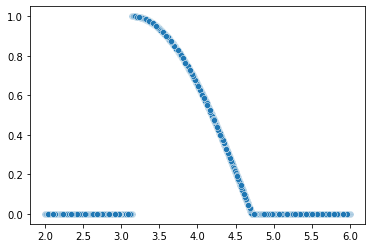

In [ ]:
import seaborn as sns
from math import sin

#Решено при условии, что заданная функция - плотность вероятности
#1
def density(x):
  if x<=pi: return 0
  elif x>pi and x<=(3*pi/2): return -cos(x)
  else: return 0

x = np.random.uniform(2,6,10000)

sns.scatterplot(y = np.array([density(x) for x in x.tolist()]), x = x.tolist())


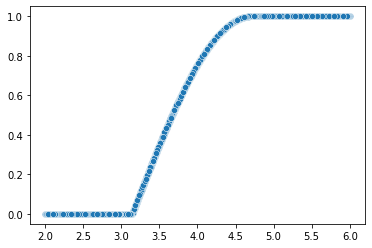

In [ ]:
#2+3
def func(x):
  if x>pi and x<=(3*pi/2): return -sin(x)
  elif x>(3*pi/2): return 1
  else: return 0

sns.scatterplot(y = np.array([func(x) for x in x.tolist()]), x = x.tolist())

#4+5

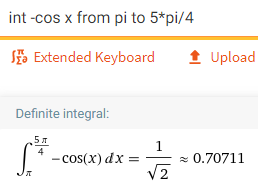


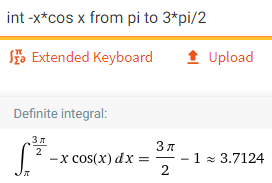


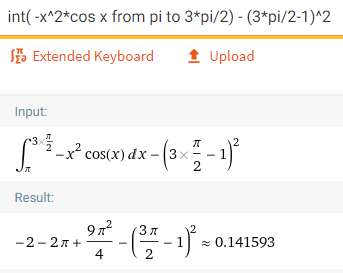


### Задание 5 [1.5 point]

 Случайная величина Х задана функцией распределения F(x).

 $$F(x)=\left\{\begin{array}{c}0, x \leq 1 \\ x-1,1<x \leq 2 \\ 1, x>2\end{array}\right.$$

 1. Является ли случайная величина Х непрерывной?

 2. имеет ли случайная величина Х плотность вероятности f(X)? Если имеет, найти ее. 
 3. постройте графики f(X) и F(X), если такое возможно.


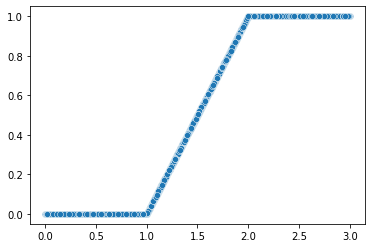

In [ ]:
#1. Да является
#2. ф(х)=1, 1-х-2
#3.

def F(x):
  return 0 if x<=1 else 1 if x>2 else x-1

def f(x):
  return 0 if x<=1 else 0 if x>2 else 1

x = np.random.uniform(0,3,10000)

sns.scatterplot(y = np.array([F(x) for x in x.tolist()]), x = x.tolist())

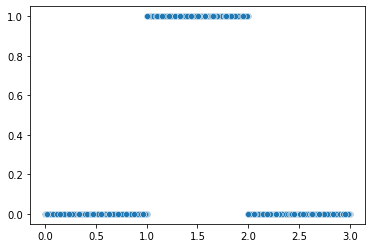

In [ ]:
sns.scatterplot(y = np.array([f(x) for x in x.tolist()]), x = x.tolist())

### Задание 6

Рассмотрим несбалансированный набор данных с соотношением меньшего класса к большему 1: 100, где 100 экземпляров принадлежит меньшему классу, а 10 000 большему.

Модель ML делает прогнозы и предсказывает 120 примеров как принадлежащих к классу меньшинства, 90 из которых верны, а 30 - неверны.

Найти:

- Precision **[0.5 point]**
- Recall **[0.5 point]**
- $F_1$ метрику **[0.5 point]**

In [ ]:
#precision = 90/120 = 0.75
#recall = 90/100 = 0.9
#f1 = pr*rec/(pr+rec)=0.9*0.75/(0.9+0.75)=0.409